In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"D:\\merge\\tourism_India.csv", encoding='latin-1')
df.head()

,Place,Rating,Best Time to Visit,Description,Tags
0,Agartala,3.8,hroughout the year,"Home to the Manikya Kings in the past, Agartal...","""Gateway to Tripuran Heritage"""
1,Agra,4.2,October to March,Located on the banks of River Yamuna in Uttar ...,"""The city of Taj Mahal, the monument of etern..."
2,Ahmedabad,4.1,October to March,"A rapidly growing metropolis, an industrial hu...","""Manchester of the East"""
3,Ajanta and Ellora Caves,4.4,June to March,"Ajanta and Ellora caves, considered to be one ...","""World Heritage Ancient Rock-Cut Caves"""
4,Ajmer,3.8,October to March,"Surrounded by Aravali ranges, the city of Ajme...","""The land of Ajmer Sharif Dargah"""


In [8]:
import pandas as pd
from geopy.geocoders import Nominatim

# Assuming you have the 'df' DataFrame with the places data
df= pd.read_csv(r"D:\\merge\\tourism_India.csv", encoding='latin-1')
df.head()
# Function to get the latitude and longitude for a given place using geocoding
def get_coordinates(place, country):
    geolocator = Nominatim(user_agent="my-app")
    location = geolocator.geocode(place + ', ' + country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Get the country value
country = 'India'

# Iterate over the dataframe rows and calculate latitude and longitude for each place
latitude = []
longitude = []

for index, row in df.iterrows():
    place = row['Place']
    lat, lon = get_coordinates(place, country)
    latitude.append(lat)
    longitude.append(lon)

# Add the latitude and longitude columns to the dataframe
df['Latitude'] = latitude
df['Longitude'] = longitude

# Print the dataframe with latitude and longitude
print(df)




                      Place  Rating  Best Time to Visit  \
0                  Agartala     3.8  hroughout the year   
1                      Agra     4.2    October to March   
2                 Ahmedabad     4.1    October to March   
3   Ajanta and Ellora Caves     4.4       June to March   
4                     Ajmer     3.8    October to March   
..                      ...     ...                 ...   
95                 Varanasi     4.5    October to March   
96                  Varkala     4.5  hroughout the year   
97            Visakhapatnam     4.4  September to March   
98                Vrindavan     4.3    October to March   
99                  Wayanad     4.3  hroughout the year   

                                          Description  \
0   Home to the Manikya Kings in the past, Agartal...   
1   Located on the banks of River Yamuna in Uttar ...   
2   A rapidly growing metropolis, an industrial hu...   
3   Ajanta and Ellora caves, considered to be one ...   
4   Su

NameError: name 'new_df' is not defined

In [9]:
'''file_path = r"D:\merge\new_dataframe.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)'''

In [18]:
df=pd.read_csv(r"D:\merge\new_dataframe.csv")
df.head()

,Place,Rating,Best Time to Visit,Description,Tags,Latitude,Longitude
0,Agartala,3.8,hroughout the year,"Home to the Manikya Kings in the past, Agartal...","""Gateway to Tripuran Heritage""",23.831238,91.282382
1,Agra,4.2,October to March,Located on the banks of River Yamuna in Uttar ...,"""The city of Taj Mahal, the monument of etern...",27.175255,78.009816
2,Ahmedabad,4.1,October to March,"A rapidly growing metropolis, an industrial hu...","""Manchester of the East""",23.021624,72.579707
3,Ajanta and Ellora Caves,4.4,June to March,"Ajanta and Ellora caves, considered to be one ...","""World Heritage Ancient Rock-Cut Caves""",20.026800,20.532900
4,Ajmer,3.8,October to March,"Surrounded by Aravali ranges, the city of Ajme...","""The land of Ajmer Sharif Dargah""",26.469100,74.639000


In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from geopy.distance import geodesic

# Assuming you have the 'df' DataFrame with latitude, longitude, and place columns

# Select the latitude and longitude columns as input features for clustering
X = df[['Latitude', 'Longitude']]

# Define the number of clusters for k-means
num_clusters = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Function to recommend nearby places based on a given place's latitude and longitude
def recommend_nearby_places(lat, lon, distance_threshold):
    nearby_places = []
    target_location = (lat, lon)
    
    for _, row in df.iterrows():
        location = (row['Latitude'], row['Longitude'])
        distance = geodesic(target_location, location).kilometers
        
        if distance <= distance_threshold:
            nearby_places.append(row['Place'])
    
    return nearby_places

# Get the input place and distance threshold from the user
input_place = input("Enter a place name: ")
distance_threshold = float(input("Enter the maximum distance threshold (in kilometers): "))

# Get the latitude and longitude of the input place
input_location = df[df['Place'] == input_place]
input_lat = input_location['Latitude'].values[0]
input_lon = input_location['Longitude'].values[0]

# Recommend nearby places based on the input location
recommended_places = recommend_nearby_places(input_lat, input_lon, distance_threshold)

# Print the recommended places
if recommended_places:
    print("Recommended places nearby:")
    for place in recommended_places:
        print(place)
else:
    print("No nearby places found within the specified distance threshold.")




Enter a place name: Agra
Enter the maximum distance threshold (in kilometers): 234
Recommended places nearby:
Agra
Delhi
Gwalior
Jaipur
Mathura
Ranthambore
Vrindavan


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\new_dataframe.csv")
df.head()

,Place,Rating,Best Time to Visit,Description,Tags,Latitude,Longitude
0,Agartala,3.8,Throughout the year,"Home to the Manikya Kings in the past, Agartal...","""Gateway to Tripuran Heritage""",23.831238,91.282382
1,Agra,4.2,October to March,Located on the banks of River Yamuna in Uttar ...,"""The city of Taj Mahal, the monument of etern...",27.175255,78.009816
2,Ahmedabad,4.1,October to March,"A rapidly growing metropolis, an industrial hu...","""Manchester of the East""",23.021624,72.579707
3,Ajanta and Ellora Caves,4.4,June to March,"Ajanta and Ellora caves, considered to be one ...","""World Heritage Ancient Rock-Cut Caves""",20.026800,20.532900
4,Ajmer,3.8,October to March,"Surrounded by Aravali ranges, the city of Ajme...","""The land of Ajmer Sharif Dargah""",26.469100,74.639000


In [3]:
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
df['Description'] = df['Description'].apply(lambda x: word_tokenize(x.lower()))
df['Description'] = df['Description'].apply(lambda x: [word for word in x if word not in stop_words])

In [6]:
# Lemmatization using NLTK
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df['Description'] = df['Description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [15]:
df['Description_len']=df['Description'].apply(lambda x: len(x))

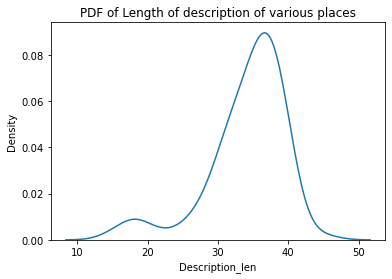

In [20]:
sns.kdeplot(df['Description_len'], palette="rocket")
plt.title('PDF of Length of description of various places')
plt.show()

In [21]:
df['Description']

0     [home, manikya, king, past, ,, agartala, perfe...
1     [located, bank, river, yamuna, uttar, pradesh,...
2     [rapidly, growing, metropolis, ,, industrial, ...
3     [ajanta, ellora, cave, ,, considered, one, fin...
4     [surrounded, aravali, range, ,, city, ajmer, f...
                            ...                        
95    [world, 's, oldest, living, city, ,, varanasi,...
96    [varkala, coastal, town, southern, part, keral...
97    [visakhapatnam, ,, also, commonly, known, viza...
98    [one, oldest, city, bank, yamuna, ,, vrindavan...
99    [replete, waterfall, ,, historical, cave, ,, c...
Name: Description, Length: 100, dtype: object

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


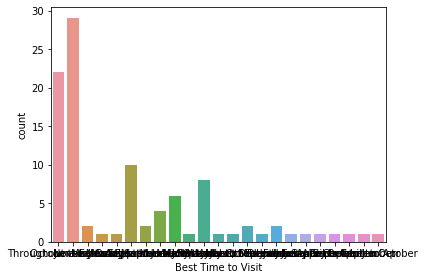

In [53]:
sns.countplot(df['Best Time to Visit'])
plt.tight_layout()

In [60]:
df['Best Time to Visit'].value_counts()[:5].keys()

Index(['October to March', 'Throughout the year', 'October to Jun',
       'July to March', 'September to March'],
      dtype='object')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


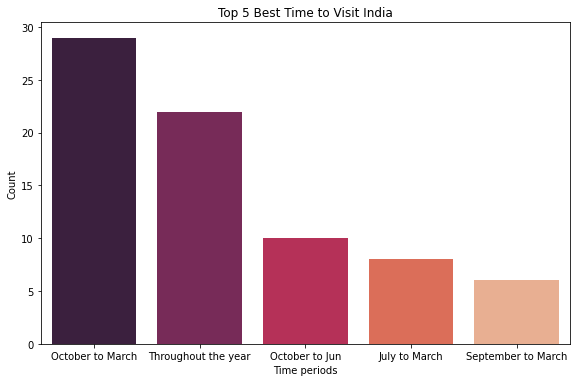

In [69]:
fig=plt.figure(figsize=(8,5))
sns.barplot(df['Best Time to Visit'].value_counts()[:5].keys(),df['Best Time to Visit'].value_counts()[:5].values, palette='rocket')
plt.tight_layout()
plt.title('Top 5 Best Time to Visit India')
plt.xlabel('Time periods')
plt.ylabel('Count')
plt.show()

In [75]:
df[df.Rating>=4.6][['Place','Rating']]

,Place,Rating
8,Amarnath,4.6
32,Gulmarg,4.6
50,Khajuraho,4.6
58,Leh Ladakh,4.6
